In [ ]:
import seml
import pandas as pd

In [ ]:
results = seml.get_results('transVAE_251023_redone', to_data_frame=True)

  0%|          | 0/480 [00:00<?, ?it/s]

  0%|          | 0/480 [00:00<?, ?it/s]

In [5]:
results.to_csv("./results/exp251023.csv")

In [6]:
results.shape

(480, 47)

In [8]:
results

,_id,config.overwrite,config.db_collection,config.addl_dataset_train,config.cov_embed_dims,config.dataset_ground_truth1,config.dataset_ground_truth2,config.dataset_to_predict,config.dropout_rate,config.kl_weight,...,result.pvals_adj_corr_dbdb,result.scores_ranks_corr_dbdb,result.shared_top_genes_mSTZ,result.scores_corr_mSTZ,result.pvals_adj_corr_mSTZ,result.scores_ranks_corr_mSTZ,result.logfold_corr_dbdb,result.prop_of_genes_set_to_0_dbdb,result.logfold_corr_mSTZ,result.prop_of_genes_set_to_0_mSTZ
0,1,1,transVAE_251023_redone,train_adata_baseline_3000hvg.h5ad,10,dbdb_ground_truth_3000hvg.h5ad,mSTZ_ground_truth_3000hvg.h5ad,wang_to_predict_3000hvg.h5ad,0.2,0.005,...,-0.021721,-0.074368,0.359,0.056499,0.001057,0.089760,0.144940,0.243136,0.121101,0.273707
1,2,2,transVAE_251023_redone,train_adata_baseline_3000hvg.h5ad,10,dbdb_ground_truth_3000hvg.h5ad,mSTZ_ground_truth_3000hvg.h5ad,wang_to_predict_3000hvg.h5ad,0.2,0.005,...,-0.040812,-0.126151,0.360,0.061870,-0.005882,0.120673,0.150533,0.257058,0.107783,0.243031
2,3,3,transVAE_251023_redone,train_adata_baseline_3000hvg.h5ad,10,dbdb_ground_truth_3000hvg.h5ad,mSTZ_ground_truth_3000hvg.h5ad,wang_to_predict_3000hvg.h5ad,0.2,0.005,...,-0.015948,-0.091391,0.354,0.054093,0.000179,0.077962,0.145310,0.246188,0.101554,0.259534
3,4,4,transVAE_251023_redone,train_adata_baseline_3000hvg.h5ad,10,dbdb_ground_truth_3000hvg.h5ad,mSTZ_ground_truth_3000hvg.h5ad,wang_to_predict_3000hvg.h5ad,0.2,0.005,...,-0.016884,-0.087788,0.357,0.044058,-0.007092,0.069905,0.152195,0.249054,0.109160,0.246894
4,5,5,transVAE_251023_redone,train_adata_baseline_3000hvg.h5ad,10,dbdb_ground_truth_3000hvg.h5ad,mSTZ_ground_truth_3000hvg.h5ad,wang_to_predict_3000hvg.h5ad,0.2,0.005,...,-0.034002,-0.154375,0.360,0.040337,-0.017106,0.081627,0.151568,0.252892,0.110887,0.246407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,476,476,transVAE_251023_redone,extra_mouse_young_3000hvg.h5ad,10,dbdb_ground_truth_3000hvg.h5ad,mSTZ_ground_truth_3000hvg.h5ad,wang_to_predict_3000hvg.h5ad,0.3,0.005,...,-0.033082,0.021465,0.425,0.077189,-0.002314,0.214194,0.146020,0.218805,0.124627,0.238812
476,477,477,transVAE_251023_redone,extra_mouse_young_3000hvg.h5ad,10,dbdb_ground_truth_3000hvg.h5ad,mSTZ_ground_truth_3000hvg.h5ad,wang_to_predict_3000hvg.h5ad,0.3,0.005,...,-0.016330,0.120227,0.432,0.211539,0.019758,0.251301,0.141476,0.233315,0.102277,0.263289
477,478,478,transVAE_251023_redone,extra_mouse_young_3000hvg.h5ad,10,dbdb_ground_truth_3000hvg.h5ad,mSTZ_ground_truth_3000hvg.h5ad,wang_to_predict_3000hvg.h5ad,0.3,0.005,...,0.019525,0.019136,0.471,0.157951,-0.009999,0.284856,0.152230,0.235792,0.113224,0.280713
478,479,479,transVAE_251023_redone,extra_mouse_young_3000hvg.h5ad,10,dbdb_ground_truth_3000hvg.h5ad,mSTZ_ground_truth_3000hvg.h5ad,wang_to_predict_3000hvg.h5ad,0.3,0.005,...,-0.033041,-0.041851,0.428,0.128105,-0.017966,0.173130,0.146460,0.213476,0.117388,0.217864


In [ ]:
groups = results.groupby(["config.addl_dataset_train", "config.n_hidden", "config.n_layers", "config.dropout_rate", "config.weight_decay"])
groups_mean = groups.mean(numeric_only=True)
groups_mean = groups_mean.reset_index()
#groups_extra.mean(numeric_only=True)[['result.r2_dbdb_healthy', 'result.r2_dbdb_OOD',
#                                'result.r2_mSTZ_healthy', 'result.r2_mSTZ_OOD']].sort_values("result.r2_dbdb_OOD", ascending=False)

In [ ]:
groups_mean['avg_r2'] = groups_mean[['result.r2_dbdb_healthy', 'result.r2_dbdb_OOD','result.r2_mSTZ_healthy', 'result.r2_mSTZ_OOD']].mean(axis=1)
groups_mean['avg_r2_h'] = groups_mean[['result.r2_dbdb_healthy','result.r2_mSTZ_healthy']].mean(axis=1)
groups_mean['avg_r2_OOD'] = groups_mean[['result.r2_dbdb_OOD','result.r2_mSTZ_OOD']].mean(axis=1)

#result_extra_mean[['result.r2_dbdb_healthy', 'result.r2_dbdb_OOD',
#                   'result.r2_mSTZ_healthy', 'result.r2_mSTZ_OOD', 'avg_r2', 'avg_r2_h', 'avg_r2_OOD']].sort_values(by='avg_r2_OOD', ascending=False)


### Results all

In [8]:
import matplotlib.pyplot as plt

top_performers = {}

tested_data = ['result.r2_dbdb_healthy', 'result.r2_dbdb_OOD', 'result.r2_mSTZ_healthy', 'result.r2_mSTZ_OOD']

for column in tested_data:
    top_performers[column] = []
    for dataset in groups_mean["config.addl_dataset_train"].unique():
        tmp_results = groups_mean[groups_mean["config.addl_dataset_train"] == dataset][column]
        top_row = tmp_results.nlargest(1)
        top_index = top_row.index[0]
        top_value = top_row.values[0]
        
        top_performers[column].append((dataset, top_value))

    top_performers[column].sort(key=lambda x: x[1], reverse=False)

In [2]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import matplotlib.patches as mpatches

# Assuming top_performers is your original dict of datasets

# Define base colors for each group
base_colors = {
    'random': 'orange',
    'embedding_mouse': 'green',
    'embedding_human': 'grey',
    'extra_mouse': 'purple',
    'extra_human': 'blue',
    'other': 'pink',  # For datasets that don't fit into the above categories
}

# Helper function to lighten a color
def lighten_color(color, amount=0.5):
    try:
        c = mcolors.cnames[color]
    except:
        c = color
    c = np.array(mcolors.to_rgb(c))
    return mcolors.to_hex((1 - amount) * c + amount * np.array([1, 1, 1]))

# Create a color map for all possible labels in the top_performers dict
color_map = {}
for performers in top_performers.values():
    for name, _ in performers:
        short_name = name.replace('_3000hvg.h5ad', '')
        if 'random' in short_name:
            group_color = 'random'
        elif 'embedding' in short_name and 'mouse' in short_name:
            group_color = 'embedding_mouse'
        elif 'embedding' in short_name and 'human' in short_name:
            group_color = 'embedding_human'
        elif 'extra' in short_name and 'human' in short_name:
            group_color = 'extra_human'
        elif 'extra' in short_name and 'mouse' in short_name:
            group_color = 'extra_mouse'
        else:
            group_color = 'other'
        color_map[short_name] = lighten_color(base_colors[group_color], amount=0.75)

# Explicitly color 'train_adata_baseline' in red
color_map['train_adata_baseline'] = 'red'


# Plotting in one figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes_flat = axes.flatten()

# Use the dictionary to create a legend
legend_handles = [
    mpatches.Patch(color=color_map['train_adata_baseline'], label='train adata baseline'),
    mpatches.Patch(color=lighten_color(base_colors['random']), label='Random'),
    mpatches.Patch(color=lighten_color(base_colors['embedding_mouse']), label='Embedding Mouse'),
    mpatches.Patch(color=lighten_color(base_colors['embedding_human']), label='Embedding Human'),
    mpatches.Patch(color=lighten_color(base_colors['extra_mouse']), label='Extra Mouse'),
    mpatches.Patch(color=lighten_color(base_colors['extra_human']), label='Extra Human'),
    mpatches.Patch(color=lighten_color(base_colors['other']), label='Other'),
]

for ax, (column, performers) in zip(axes_flat, top_performers.items()):
    labels, values = zip(*performers)
    cleaned_labels = [label.replace('_3000hvg.h5ad', '') for label in labels]
    col_name = column.split(".")[1]
    col_name = " ".join(col_name.split("_")[1:3])
    
    # Create horizontal bars
    bars = ax.barh(cleaned_labels, values)

    # Color the bars using the color map
    for bar, label in zip(bars, cleaned_labels):
        bar.set_color(color_map[label])

    ax.set_title(col_name)
    ax.set_xlabel('Performance')
    ax.set_yticks(range(len(cleaned_labels)))
    ax.set_yticklabels(cleaned_labels)

    ax.set_xlim([0, 1.1])  # Adjust the x-axis limit to fit your data

    # Adding values on the side of the bars
    for bar in bars:
        xval = bar.get_width()
        ax.text(xval + 0.01, bar.get_y() + bar.get_height() / 2, round(xval, 3), va='center')

# Add the legend to the last subplot for clarity
axes_flat[0].legend(handles=legend_handles, loc='lower left')

plt.suptitle('Top performers for each test datasplit - R2')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the rect so the suptitle fits
plt.savefig("fig_251023/r2_score_plots.png")
plt.show()

NameError: name 'top_performers' is not defined

In [42]:
import matplotlib.pyplot as plt

top_performers = {}

tested_data = ['result.shared_top_genes_dbdb', 'result.scores_corr_dbdb', 'result.pvals_adj_corr_dbdb', 'result.scores_ranks_corr_dbdb']

for column in tested_data:
    top_performers[column] = []
    for dataset in groups_mean["config.addl_dataset_train"].unique():
        tmp_results = groups_mean[groups_mean["config.addl_dataset_train"] == dataset][column]
        top_row = tmp_results.nlargest(1)
        top_index = top_row.index[0]
        top_value = top_row.values[0]
        
        top_performers[column].append((dataset, top_value))

    top_performers[column].sort(key=lambda x: x[1], reverse=False)

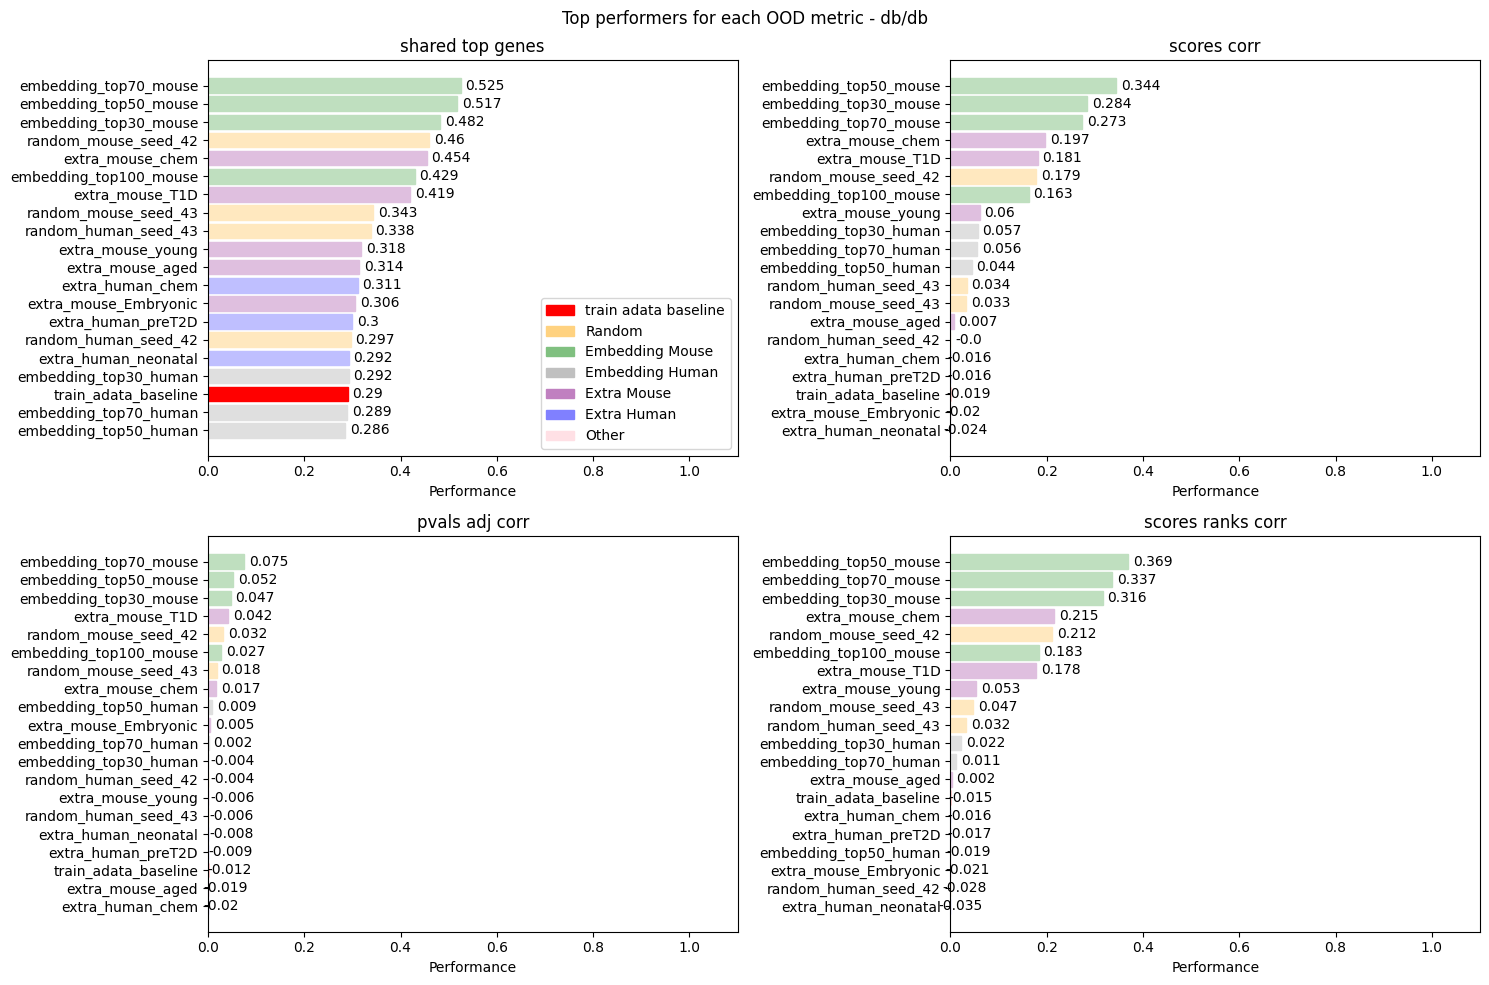

In [43]:
# Plotting in one figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes_flat = axes.flatten()

for ax, (column, performers) in zip(axes_flat, top_performers.items()):
    labels, values = zip(*performers)
    cleaned_labels = [label.replace('_3000hvg.h5ad', '') for label in labels]
    col_name = column.split(".")[1]
    col_name = " ".join(col_name.split("_")[:-1])
    
    # Create horizontal bars
    bars = ax.barh(cleaned_labels, values)

    # Color the bars using the color map
    for bar, label in zip(bars, cleaned_labels):
        bar.set_color(color_map[label])

    ax.set_title(col_name)
    ax.set_xlabel('Performance')
    ax.set_yticks(range(len(cleaned_labels)))
    ax.set_yticklabels(cleaned_labels)

    ax.set_xlim([0, 1.1])  # Adjust the x-axis limit to fit your data

    # Adding values on the side of the bars
    for bar in bars:
        xval = bar.get_width()
        ax.text(xval + 0.01, bar.get_y() + bar.get_height() / 2, round(xval, 3), va='center')

# Add the legend to the last subplot for clarity
axes_flat[0].legend(handles=legend_handles, loc='lower right')

plt.suptitle('Top performers for each OOD metric - db/db') 
plt.tight_layout()
plt.savefig("fig_251023/OOD_metrics_dbdb.png")
plt.show()


In [44]:
import matplotlib.pyplot as plt

top_performers = {}

tested_data = ['result.shared_top_genes_mSTZ', 'result.scores_corr_mSTZ', 'result.pvals_adj_corr_mSTZ', 'result.scores_ranks_corr_mSTZ']

for column in tested_data:
    top_performers[column] = []
    for dataset in groups_mean["config.addl_dataset_train"].unique():
        tmp_results = groups_mean[groups_mean["config.addl_dataset_train"] == dataset][column]
        top_row = tmp_results.nlargest(1)
        top_index = top_row.index[0]
        top_value = top_row.values[0]
        
        top_performers[column].append((dataset, top_value))

    top_performers[column].sort(key=lambda x: x[1], reverse=False)

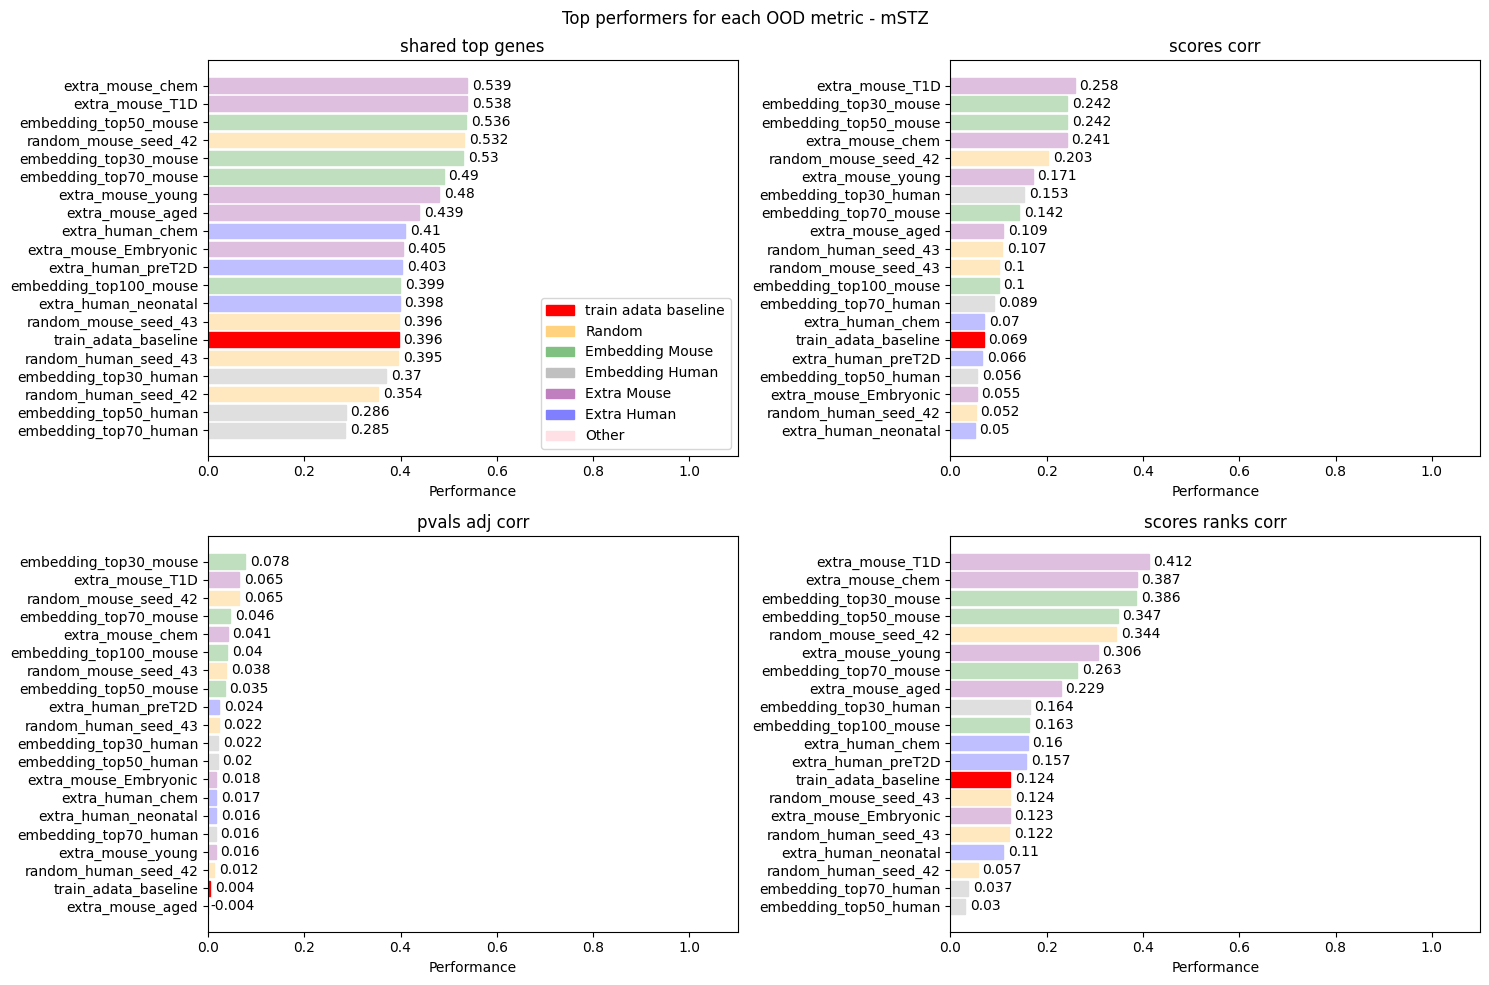

In [46]:
# Plotting in one figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes_flat = axes.flatten()

for ax, (column, performers) in zip(axes_flat, top_performers.items()):
    labels, values = zip(*performers)
    cleaned_labels = [label.replace('_3000hvg.h5ad', '') for label in labels]
    col_name = column.split(".")[1]
    col_name = " ".join(col_name.split("_")[:-1])
    
    # Create horizontal bars
    bars = ax.barh(cleaned_labels, values)

    # Color the bars using the color map
    for bar, label in zip(bars, cleaned_labels):
        bar.set_color(color_map[label])

    ax.set_title(col_name)
    ax.set_xlabel('Performance')
    ax.set_yticks(range(len(cleaned_labels)))
    ax.set_yticklabels(cleaned_labels)

    ax.set_xlim([0, 1.1])  # Adjust the x-axis limit to fit your data

    # Adding values on the side of the bars
    for bar in bars:
        xval = bar.get_width()
        ax.text(xval + 0.01, bar.get_y() + bar.get_height() / 2, round(xval, 3), va='center')

# Add the legend to the last subplot for clarity
axes_flat[0].legend(handles=legend_handles, loc='lower right')

plt.suptitle('Top performers for each OOD metric - mSTZ') 
plt.tight_layout()
plt.savefig("fig_251023/OOD_metrics_mSTZ.png")
plt.show()


In [ ]:
import matplotlib.pyplot as plt

top_performers = {}

tested_data = ['result.', 'result.logfold_corr_mSTZ']

for column in tested_data:
    top_performers[column] = []
    for dataset in groups_mean["config.addl_dataset_train"].unique():
        tmp_results = groups_mean[groups_mean["config.addl_dataset_train"] == dataset][column]
        top_row = tmp_results.nlargest(1)
        top_index = top_row.index[0]
        top_value = top_row.values[0]
        
        top_performers[column].append((dataset, top_value))

    top_performers[column].sort(key=lambda x: x[1], reverse=False)

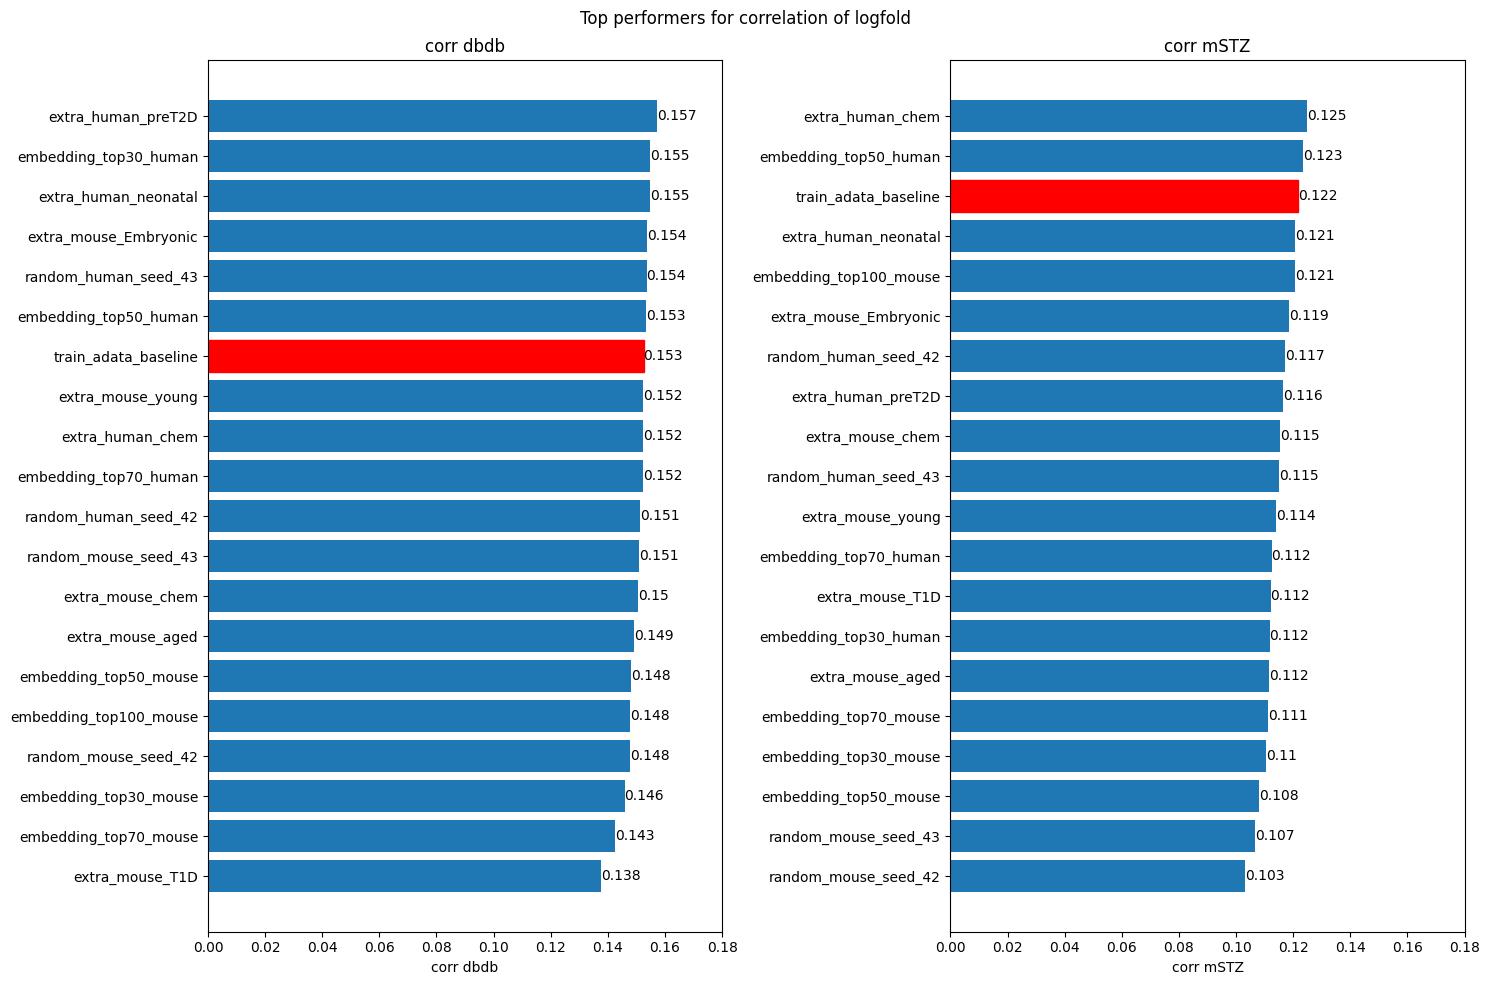

In [ ]:
# Plotting in one figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))

axes_flat = axes.flatten()  # Convert 2x2 matrix of axes into a flat list for easier iteration

for ax, (column, performers) in zip(axes_flat, top_performers.items()):
    labels, values = zip(*performers)
    cleaned_labels = [label.replace('_3000hvg.h5ad', '') for label in labels]
    col_name = column.split(".")[1]
    col_name = " ".join(col_name.split("_")[1:3])
    
    # Create bars
    bars = ax.barh(cleaned_labels, values)  # Use barh for horizontal bars

    # Color the "train_adata_baseline" bar in red
    for bar, label in zip(bars, cleaned_labels):
        if label == "train_adata_baseline":
            bar.set_color('red')

    ax.set_title(col_name)
    ax.set_xlabel(col_name)
    ax.set_yticks(cleaned_labels)
    ax.set_yticklabels(cleaned_labels)  # No rotation needed here
    ax.set_xlim([0, 0.18])

    # Adding values on the side of the bars
    for bar in bars:
        xval = bar.get_width()
        ax.text(xval, bar.get_y() + bar.get_height() / 2, round(xval, 3), ha='left', va='center')

plt.suptitle('Top performers for correlation of logfold') 
plt.tight_layout()
plt.savefig("fig_251023/correlation_logfold.png")
plt.show()

### ANOVA

### Prepare for ANOVA and Tukey HSD

In [77]:
top_configs = {}

for column in tested_data:
    top_configs[column] = {}
    for dataset in groups_mean["config.addl_dataset_train"].unique():
        tmp_results = groups_mean[groups_mean["config.addl_dataset_train"] == dataset][column]
        top_row = tmp_results.nlargest(1)
        top_configs[column][dataset] = top_row.index[0]


top_performers_all_seeds = {}

for column, configs in top_configs.items():
    top_performers_all_seeds[column] = {}
    for dataset, config_index in configs.items():
        # Getting the specific configuration details from groups_mean
        config_details = groups_mean.loc[config_index]
        
        # Filtering original 'results' dataframe for matching rows
        matching_rows = results[
            (results["config.addl_dataset_train"] == config_details["config.addl_dataset_train"]) & 
            (results["config.n_hidden"] == config_details["config.n_hidden"]) &
            (results["config.n_layers"] == config_details["config.n_layers"]) &
            (results["config.dropout_rate"] == config_details["config.dropout_rate"]) &
            (results["config.weight_decay"] == config_details["config.weight_decay"])
        ]
        
        top_performers_all_seeds[column][dataset] = matching_rows


import pandas as pd

# 1. Flatten the nested dictionary structure
all_dataframes = []
for column, datasets in top_performers_all_seeds.items():
    for dataset, data in datasets.items():
        # Check if data is a DataFrame before processing
        if isinstance(data, pd.DataFrame):
            # Adding a column to indicate the dataset and metric column
            df = data.copy()  # Make a copy to avoid modifying the original data
            df['which_metric'] = column
            all_dataframes.append(df)

# 2. Concatenate DataFrames
final_df = pd.concat(all_dataframes, axis=0, ignore_index=True)

# 3. Add a unique identifier for each configuration (excluding seed).
config_cols = [
    "config.addl_dataset_train", 
    "config.n_hidden", 
    "config.n_layers", 
    "config.dropout_rate", 
    "config.weight_decay"
]

final_df["config_id"] = final_df[config_cols].apply(lambda row: '_'.join(row.map(str)), axis=1)

# Save the DataFrame
final_df.to_csv("top_performers_all_seeds.csv", index=False)


In [79]:
pd.set_option('display.max_rows', 10)
final_df

,_id,config.overwrite,config.db_collection,config.addl_dataset_train,config.cov_embed_dims,config.dataset_ground_truth1,config.dataset_ground_truth2,config.dataset_to_predict,config.dropout_rate,config.kl_weight,...,result.scores_corr_mSTZ,result.pvals_adj_corr_mSTZ,result.scores_ranks_corr_mSTZ,result.logfold_corr_dbdb,result.prop_of_genes_set_to_0_dbdb,result.logfold_corr_mSTZ,result.prop_of_genes_set_to_0_mSTZ,group_id,which_metric,config_id
0,325,325,transVAE_251023_redone,embedding_top100_mouse_3000hvg.h5ad,10,dbdb_ground_truth_3000hvg.h5ad,mSTZ_ground_truth_3000hvg.h5ad,wang_to_predict_3000hvg.h5ad,0.2,0.005,...,0.052868,0.013533,0.042388,0.148425,0.264044,0.105326,0.187194,134dc7a1b5518bda7cd1b22e1779594c,result.r2_dbdb_healthy,embedding_top100_mouse_3000hvg.h5ad_1000_6_0.2...
1,326,326,transVAE_251023_redone,embedding_top100_mouse_3000hvg.h5ad,10,dbdb_ground_truth_3000hvg.h5ad,mSTZ_ground_truth_3000hvg.h5ad,wang_to_predict_3000hvg.h5ad,0.2,0.005,...,0.101674,0.017380,0.150483,0.136608,0.272008,0.103586,0.188150,134dc7a1b5518bda7cd1b22e1779594c,result.r2_dbdb_healthy,embedding_top100_mouse_3000hvg.h5ad_1000_6_0.2...
2,327,327,transVAE_251023_redone,embedding_top100_mouse_3000hvg.h5ad,10,dbdb_ground_truth_3000hvg.h5ad,mSTZ_ground_truth_3000hvg.h5ad,wang_to_predict_3000hvg.h5ad,0.2,0.005,...,-0.015937,0.033125,-0.068452,0.121396,0.261090,0.094484,0.229060,134dc7a1b5518bda7cd1b22e1779594c,result.r2_dbdb_healthy,embedding_top100_mouse_3000hvg.h5ad_1000_6_0.2...
3,352,352,transVAE_251023_redone,embedding_top30_human_3000hvg.h5ad,10,dbdb_ground_truth_3000hvg.h5ad,mSTZ_ground_truth_3000hvg.h5ad,wang_to_predict_3000hvg.h5ad,0.2,0.005,...,0.010285,0.000190,-0.017137,0.146209,0.225719,0.100757,0.226330,af75a9b623ac33a1fb4735cfefaee8f5,result.r2_dbdb_healthy,embedding_top30_human_3000hvg.h5ad_1000_6_0.2_...
4,353,353,transVAE_251023_redone,embedding_top30_human_3000hvg.h5ad,10,dbdb_ground_truth_3000hvg.h5ad,mSTZ_ground_truth_3000hvg.h5ad,wang_to_predict_3000hvg.h5ad,0.2,0.005,...,0.013137,-0.018360,-0.016738,0.155915,0.240963,0.086902,0.253049,af75a9b623ac33a1fb4735cfefaee8f5,result.r2_dbdb_healthy,embedding_top30_human_3000hvg.h5ad_1000_6_0.2_...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,455,455,transVAE_251023_redone,random_mouse_seed_43_3000hvg.h5ad,10,dbdb_ground_truth_3000hvg.h5ad,mSTZ_ground_truth_3000hvg.h5ad,wang_to_predict_3000hvg.h5ad,0.3,0.005,...,0.190237,0.026495,0.243031,0.152249,0.239739,0.098597,0.260169,053479fc5dc8137260f4057ec8b8f600,result.r2_mSTZ_OOD,random_mouse_seed_43_3000hvg.h5ad_1000_6_0.3_0...
236,456,456,transVAE_251023_redone,random_mouse_seed_43_3000hvg.h5ad,10,dbdb_ground_truth_3000hvg.h5ad,mSTZ_ground_truth_3000hvg.h5ad,wang_to_predict_3000hvg.h5ad,0.3,0.005,...,0.127876,0.036227,0.171278,0.148251,0.245876,0.098876,0.237054,053479fc5dc8137260f4057ec8b8f600,result.r2_mSTZ_OOD,random_mouse_seed_43_3000hvg.h5ad_1000_6_0.3_0...
237,22,22,transVAE_251023_redone,train_adata_baseline_3000hvg.h5ad,10,dbdb_ground_truth_3000hvg.h5ad,mSTZ_ground_truth_3000hvg.h5ad,wang_to_predict_3000hvg.h5ad,0.3,0.005,...,0.101062,0.006204,0.190265,0.148347,0.250203,0.090637,0.237384,12de834b31192ce7543b6004948ca539,result.r2_mSTZ_OOD,train_adata_baseline_3000hvg.h5ad_1000_6_0.3_0...
238,23,23,transVAE_251023_redone,train_adata_baseline_3000hvg.h5ad,10,dbdb_ground_truth_3000hvg.h5ad,mSTZ_ground_truth_3000hvg.h5ad,wang_to_predict_3000hvg.h5ad,0.3,0.005,...,0.002901,-0.022223,0.030866,0.142972,0.215588,0.111923,0.231883,12de834b31192ce7543b6004948ca539,result.r2_mSTZ_OOD,train_adata_baseline_3000hvg.h5ad_1000_6_0.3_0...


In [321]:
# Create a DataFrame with unique configurations and an associated group number
group_identifiers = results_all.groupby(["config.dataset_train", "config.learning_rate", "config.n_hidden", "config.n_layers", "config.dropout_rate"]).size().reset_index(name='counts')
group_identifiers['group_num'] = range(1, len(group_identifiers) + 1)

# Drop the 'counts' column, as it's not needed anymore
group_identifiers = group_identifiers.drop(columns='counts')

# Merge the group identifier back to the original DataFrame based on the grouping columns
results_all_with_group = pd.merge(results_all, group_identifiers, on=["config.dataset_train", "config.learning_rate", "config.n_hidden", "config.n_layers", "config.dropout_rate"])


In [322]:
# Step 1: Extracting the top performer for each training dataset and test dataset combination

# Dictionary to store top performers for each test dataset
top_performers_for_anova = {}

for column in tested_data:
    top_performers_for_anova[column] = {}
    
    for dataset in results_all_with_group["config.dataset_train"].unique():
        tmp_results = results_all_with_group[results_all_with_group["config.dataset_train"] == dataset]
        
        # Assuming higher values are better. 
        # Get the top configuration (mean over seeds) for this training dataset and test dataset combo.
        top_row = tmp_results.groupby('group_num').mean(numeric_only = True).nlargest(1, column)
        top_group_num = top_row.index[0]
        
        # Extract performance values for all seeds of this top configuration
        perf_values = tmp_results[tmp_results['group_num'] == top_group_num][column].values
        top_performers_for_anova[column][dataset] = perf_values


In [71]:
results_all_with_group.to_csv("./results/all_ANOVA.csv")

### Best config

In [302]:
results_all_seed_mean_reset['avg_r2'] = results_all_seed_mean_reset[['result.r2_dbdb_healthy', 'result.r2_dbdb_OOD',
                                                                     'result.r2_mSTZ_healthy', 'result.r2_mSTZ_OOD']].mean(axis=1)
results_all_seed_mean_reset['avg_r2_h'] = results_all_seed_mean_reset[['result.r2_dbdb_healthy','result.r2_mSTZ_healthy']].mean(axis=1)
results_all_seed_mean_reset['avg_r2_OOD'] = results_all_seed_mean_reset[['result.r2_dbdb_OOD','result.r2_mSTZ_OOD']].mean(axis=1)


In [303]:
results_all_seed_mean_reset[['config.dataset_train', 'result.r2_dbdb_healthy', 'result.r2_dbdb_OOD',
                             'result.r2_mSTZ_healthy', 'result.r2_mSTZ_OOD', 'avg_r2', 'avg_r2_h', 'avg_r2_OOD']].sort_values(by='avg_r2_h', ascending=False).head(5)

,config.dataset_train,result.r2_dbdb_healthy,result.r2_dbdb_OOD,result.r2_mSTZ_healthy,result.r2_mSTZ_OOD,avg_r2,avg_r2_h,avg_r2_OOD
88,Baseline,0.987006,0.729646,0.980350,0.864354,0.890339,0.983678,0.797000
4,Embryonic,0.985204,0.787175,0.981408,0.909302,0.915772,0.983306,0.848239
1,Embryonic,0.988533,0.741389,0.977842,0.896107,0.900968,0.983187,0.818748
105,Baseline,0.980832,0.722103,0.983973,0.912529,0.899859,0.982403,0.817316
84,Baseline,0.987966,0.741870,0.976284,0.843462,0.887396,0.982125,0.792666


In [304]:
results_all_seed_mean_reset[['config.dataset_train', 'result.r2_dbdb_healthy', 'result.r2_dbdb_OOD',
                             'result.r2_mSTZ_healthy', 'result.r2_mSTZ_OOD', 'avg_r2', 'avg_r2_h', 'avg_r2_OOD']].sort_values(by='avg_r2_OOD', ascending=False).head(5)


,config.dataset_train,result.r2_dbdb_healthy,result.r2_dbdb_OOD,result.r2_mSTZ_healthy,result.r2_mSTZ_OOD,avg_r2,avg_r2_h,avg_r2_OOD
20,T1D,0.961454,0.854374,0.972287,0.882469,0.917646,0.966870,0.868421
47,Chem,0.917388,0.845036,0.909712,0.887491,0.889907,0.913550,0.866263
3,Embryonic,0.985063,0.822880,0.956089,0.899227,0.915815,0.970576,0.861054
4,Embryonic,0.985204,0.787175,0.981408,0.909302,0.915772,0.983306,0.848239
45,Chem,0.987431,0.861945,0.956388,0.829983,0.908937,0.971909,0.845964


In [305]:
results_all_seed_mean_reset[['config.dataset_train', 'result.r2_dbdb_healthy', 'result.r2_dbdb_OOD',
                             'result.r2_mSTZ_healthy', 'result.r2_mSTZ_OOD', 'avg_r2', 'avg_r2_h', 'avg_r2_OOD']].sort_values(by='avg_r2', ascending=False).head(5)

,config.dataset_train,result.r2_dbdb_healthy,result.r2_dbdb_OOD,result.r2_mSTZ_healthy,result.r2_mSTZ_OOD,avg_r2,avg_r2_h,avg_r2_OOD
20,T1D,0.961454,0.854374,0.972287,0.882469,0.917646,0.966870,0.868421
3,Embryonic,0.985063,0.822880,0.956089,0.899227,0.915815,0.970576,0.861054
4,Embryonic,0.985204,0.787175,0.981408,0.909302,0.915772,0.983306,0.848239
68,Young,0.983151,0.761414,0.977235,0.923159,0.911240,0.980193,0.842287
45,Chem,0.987431,0.861945,0.956388,0.829983,0.908937,0.971909,0.845964


### Plot R2 healthy vs diseased

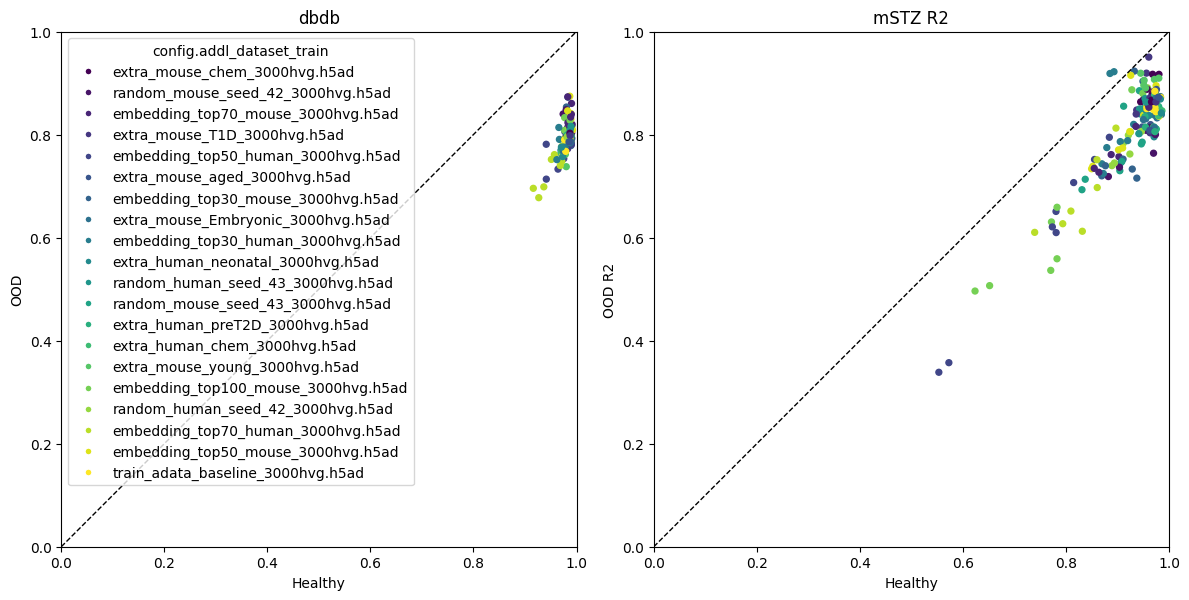

In [173]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming results_all_seed_mean_reset is a DataFrame with the mentioned columns

# Shuffle the data to deal with overlap
shuffled_data = groups_mean.sample(frac=1, random_state=42)

unique_categories = shuffled_data["config.addl_dataset_train"].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_categories)))
color_map = {category: color for category, color in zip(unique_categories, colors)}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# dbdb plot on the left (ax1)
ax1.scatter(shuffled_data["result.r2_dbdb_healthy"], 
            shuffled_data["result.r2_dbdb_OOD"], 
            c=shuffled_data["config.addl_dataset_train"].map(color_map), s=18) 
ax1.set_ylim([0, 1])
ax1.set_xlim([0, 1])
ax1.set_aspect('equal', adjustable='box')
ax1.plot([0, 1], [0, 1], 'k--', linewidth=1)
ax1.set_xlabel("Healthy")
ax1.set_ylabel("OOD")
ax1.set_title("dbdb")

# mSTZ plot on the right (ax2)
ax2.scatter(shuffled_data["result.r2_mSTZ_healthy"], 
            shuffled_data["result.r2_mSTZ_OOD"], 
            c=shuffled_data["config.addl_dataset_train"].map(color_map), s=18)
ax2.set_ylim([0, 1])
ax2.set_xlim([0, 1])
ax2.set_aspect('equal', adjustable='box')
ax2.plot([0, 1], [0, 1], 'k--', linewidth=1)
ax2.set_xlabel("Healthy")
ax2.set_ylabel("OOD R2")
ax2.set_title("mSTZ R2")

# Create a legend using the color mapping for one of the plots (since it's common)
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', label=category, 
               markersize=5, markerfacecolor=color_map[category]) for category in unique_categories]
ax1.legend(handles=legend_labels, title="config.addl_dataset_train")

# Adjust the layout
plt.tight_layout()
plt.savefig("fig_251023/r2_healthy_vs_diseased.png")
# Show the plots
plt.show()


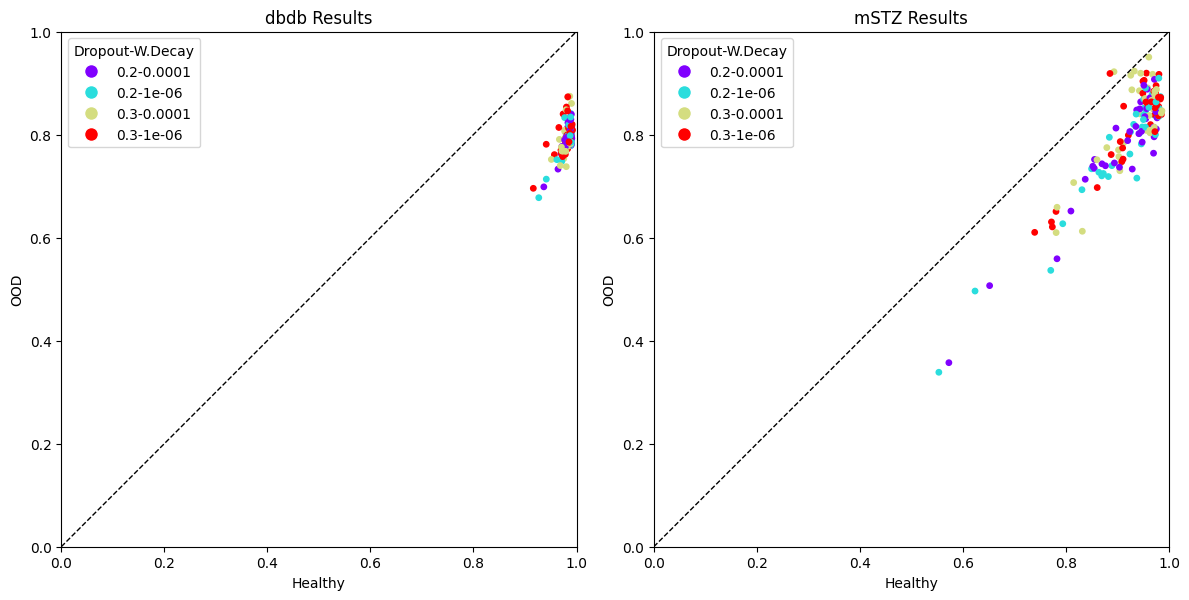

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming `groups_mean` is a DataFrame with the mentioned columns

# Shuffle the data to deal with overlap
shuffled_data = groups_mean.sample(frac=1, random_state=42)

# Create a unique key for each combination of dropout_rate and weight_decay
shuffled_data['combined_key'] = shuffled_data["config.dropout_rate"].astype(str) + "-" + shuffled_data["config.weight_decay"].astype(str)

# Get unique combinations and map each to a unique color
unique_combinations = shuffled_data['combined_key'].unique()
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_combinations)))
color_map = {combo: color for combo, color in zip(unique_combinations, colors)}

# Convert the unique combinations in the DataFrame to their corresponding colors
plot_colors = shuffled_data['combined_key'].map(color_map)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# dbdb plot on the left (ax1)
ax1.scatter(shuffled_data["result.r2_dbdb_healthy"], 
            shuffled_data["result.r2_dbdb_OOD"], 
            c=plot_colors, s=15)  # reduced markersize with s parameter
ax1.set_ylim([0, 1])
ax1.set_xlim([0, 1])
ax1.set_aspect('equal', adjustable='box')
ax1.plot([0, 1], [0, 1], 'k--', linewidth=1)
ax1.set_xlabel("Healthy")
ax1.set_ylabel("OOD")
ax1.set_title("dbdb Results")

# mSTZ plot on the right (ax2)
ax2.scatter(shuffled_data["result.r2_mSTZ_healthy"], 
            shuffled_data["result.r2_mSTZ_OOD"], 
            c=plot_colors, s=15)  # reduced markersize with s parameter
ax2.set_ylim([0, 1])
ax2.set_xlim([0, 1])
ax2.set_aspect('equal', adjustable='box')
ax2.plot([0, 1], [0, 1], 'k--', linewidth=1)
ax2.set_xlabel("Healthy")
ax2.set_ylabel("OOD")
ax2.set_title("mSTZ Results")

# Create a legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[combo], markersize=10, label=combo) for combo in unique_combinations]
ax1.legend(handles=legend_elements, title="Dropout-W.Decay")
ax2.legend(handles=legend_elements, title="Dropout-W.Decay")

plt.tight_layout()
plt.show()


### Loss per df

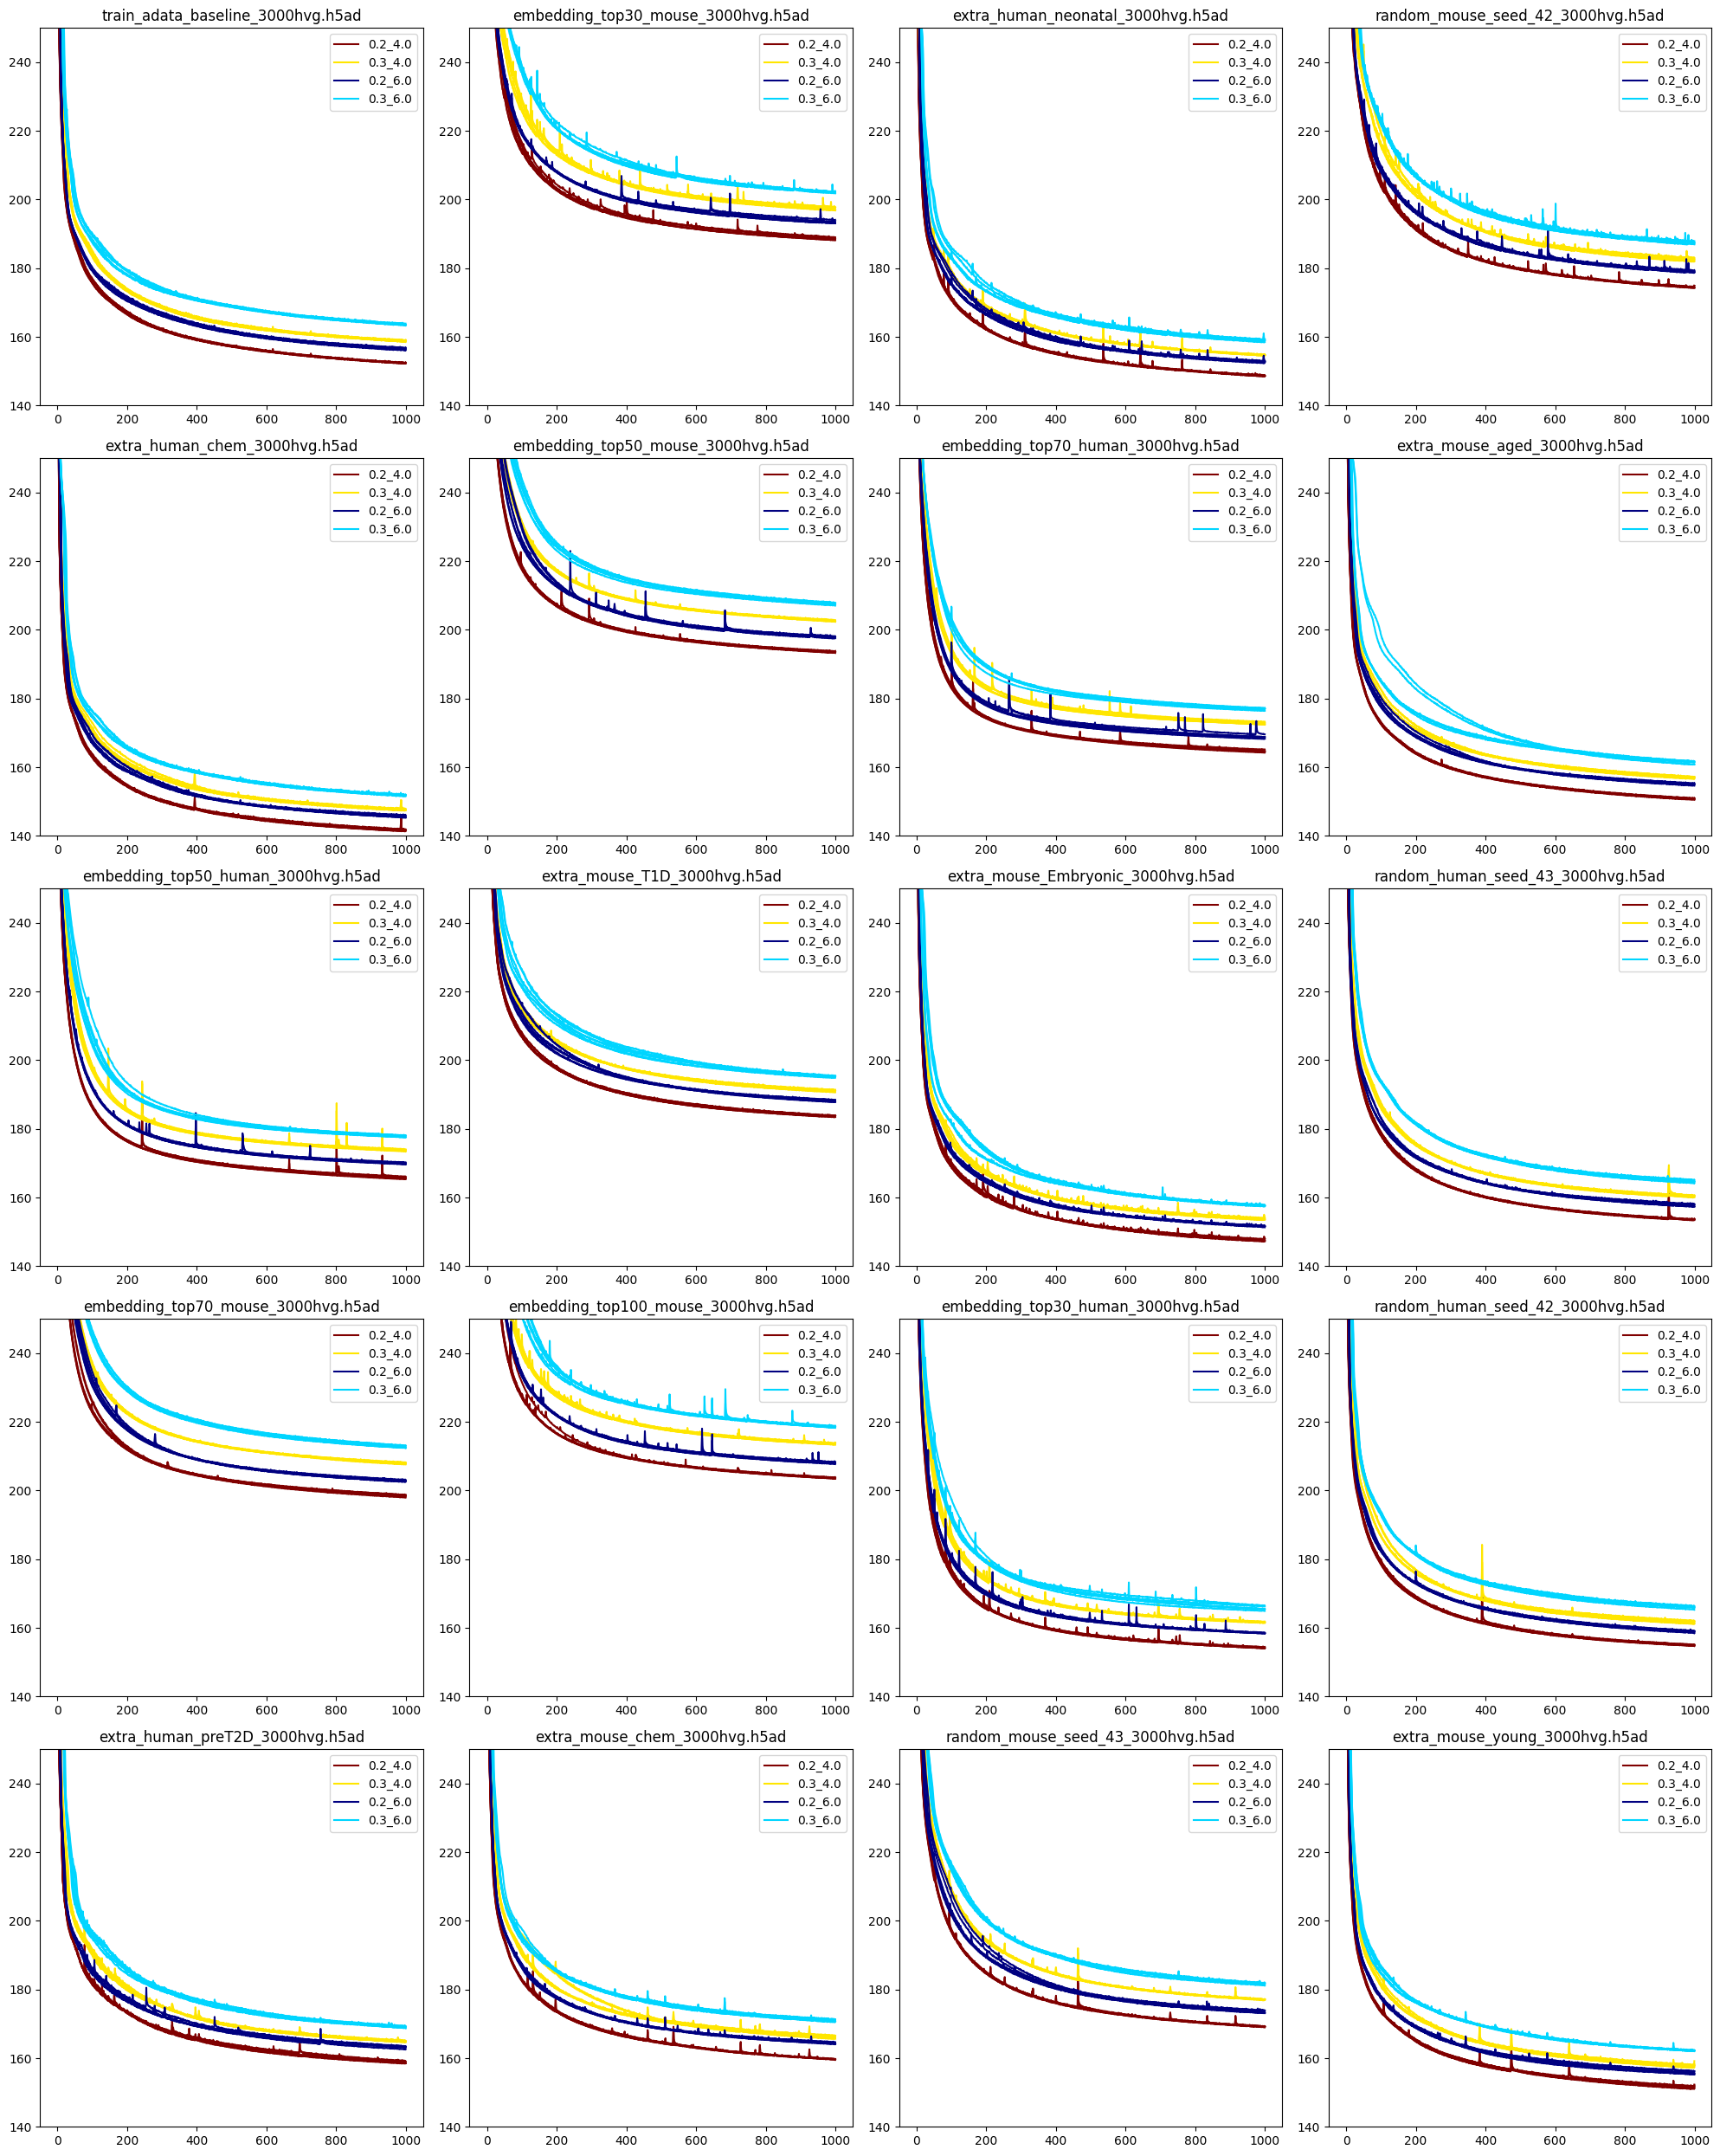

In [175]:
import matplotlib.pyplot as plt
import pandas as pd

param1 = "config.dropout_rate"
param2 = "config.n_layers"
metric = "result.reconstruction_loss_train"

save_dict = dict()
metric_df = metric.split(".")[1]

for dataset in results["config.addl_dataset_train"].unique():
    save_tmp_dict = dict()
    tmp_df = results[results["config.addl_dataset_train"] == dataset]
    for i, row in tmp_df.iterrows():
        combined_key = f"{row[param1]}_{row[param2]}_{i}"
        save_tmp_dict[combined_key] = [float(elm) for elm in row[metric][metric_df]]
    save_dict[dataset] = save_tmp_dict

# Extract unique parameter combinations and create a colormap for them
combined_params = [(row[param1], row[param2]) for _, row in results.iterrows()]
unique_params = list(set(combined_params))  # get unique combinations
colors = plt.cm.jet(np.linspace(0, 1, len(unique_params)))
color_map = dict(zip(unique_params, colors))

# Setup 5x4 subplots
fig, axes = plt.subplots(5, 4, figsize=(20, 25))
axes = axes.ravel()  # Flatten the 5x4 array for easier iteration

# Loop through all datasets and plot them
for idx, dataset_key in enumerate(save_dict.keys()):
    df = pd.DataFrame(save_dict[dataset_key])

    plotted_params = set()
    for column in df.columns:
        values = column.rsplit("_", 1)[0]  # Extracting the combined parameter values from the column name
        if values not in plotted_params:
            param_values = tuple(map(float, values.split("_")))
            df[column].plot(ax=axes[idx], color=color_map[param_values], label=f'{param_values[0]}_{param_values[1]}')
            plotted_params.add(values)
        else:
            df[column].plot(ax=axes[idx], color=color_map[param_values], label='_nolegend_')

    # Set the title and limit for each subplot
    axes[idx].set_title(dataset_key)
    axes[idx].set_ylim([140, 250])
    axes[idx].legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig("fig_251023/reconstruction_loss_per_dataset_colored_by_dr_o_rate_n_layers.png")
plt.show()


### Check parameters wrt validation datasets

In [48]:
results.columns

Index(['_id', 'config.overwrite', 'config.db_collection',
       'config.addl_dataset_train', 'config.cov_embed_dims',
       'config.dataset_ground_truth1', 'config.dataset_ground_truth2',
       'config.dataset_to_predict', 'config.dropout_rate', 'config.kl_weight',
       'config.learning_rate', 'config.max_epochs', 'config.n_hidden',
       'config.n_latent', 'config.n_layers', 'config.save_folder_name',
       'config.save_models', 'config.seed', 'config.weight_decay',
       'result.kl_weight', 'result.train_loss_step', 'result.validation_loss',
       'result.elbo_validation', 'result.reconstruction_loss_validation',
       'result.kl_local_validation', 'result.kl_global_validation',
       'result.train_loss_epoch', 'result.elbo_train',
       'result.reconstruction_loss_train', 'result.kl_local_train',
       'result.kl_global_train', 'result.r2_dbdb_healthy',
       'result.r2_dbdb_OOD', 'result.r2_mSTZ_healthy', 'result.r2_mSTZ_OOD',
       'result.shared_top_genes_dbdb', 'r

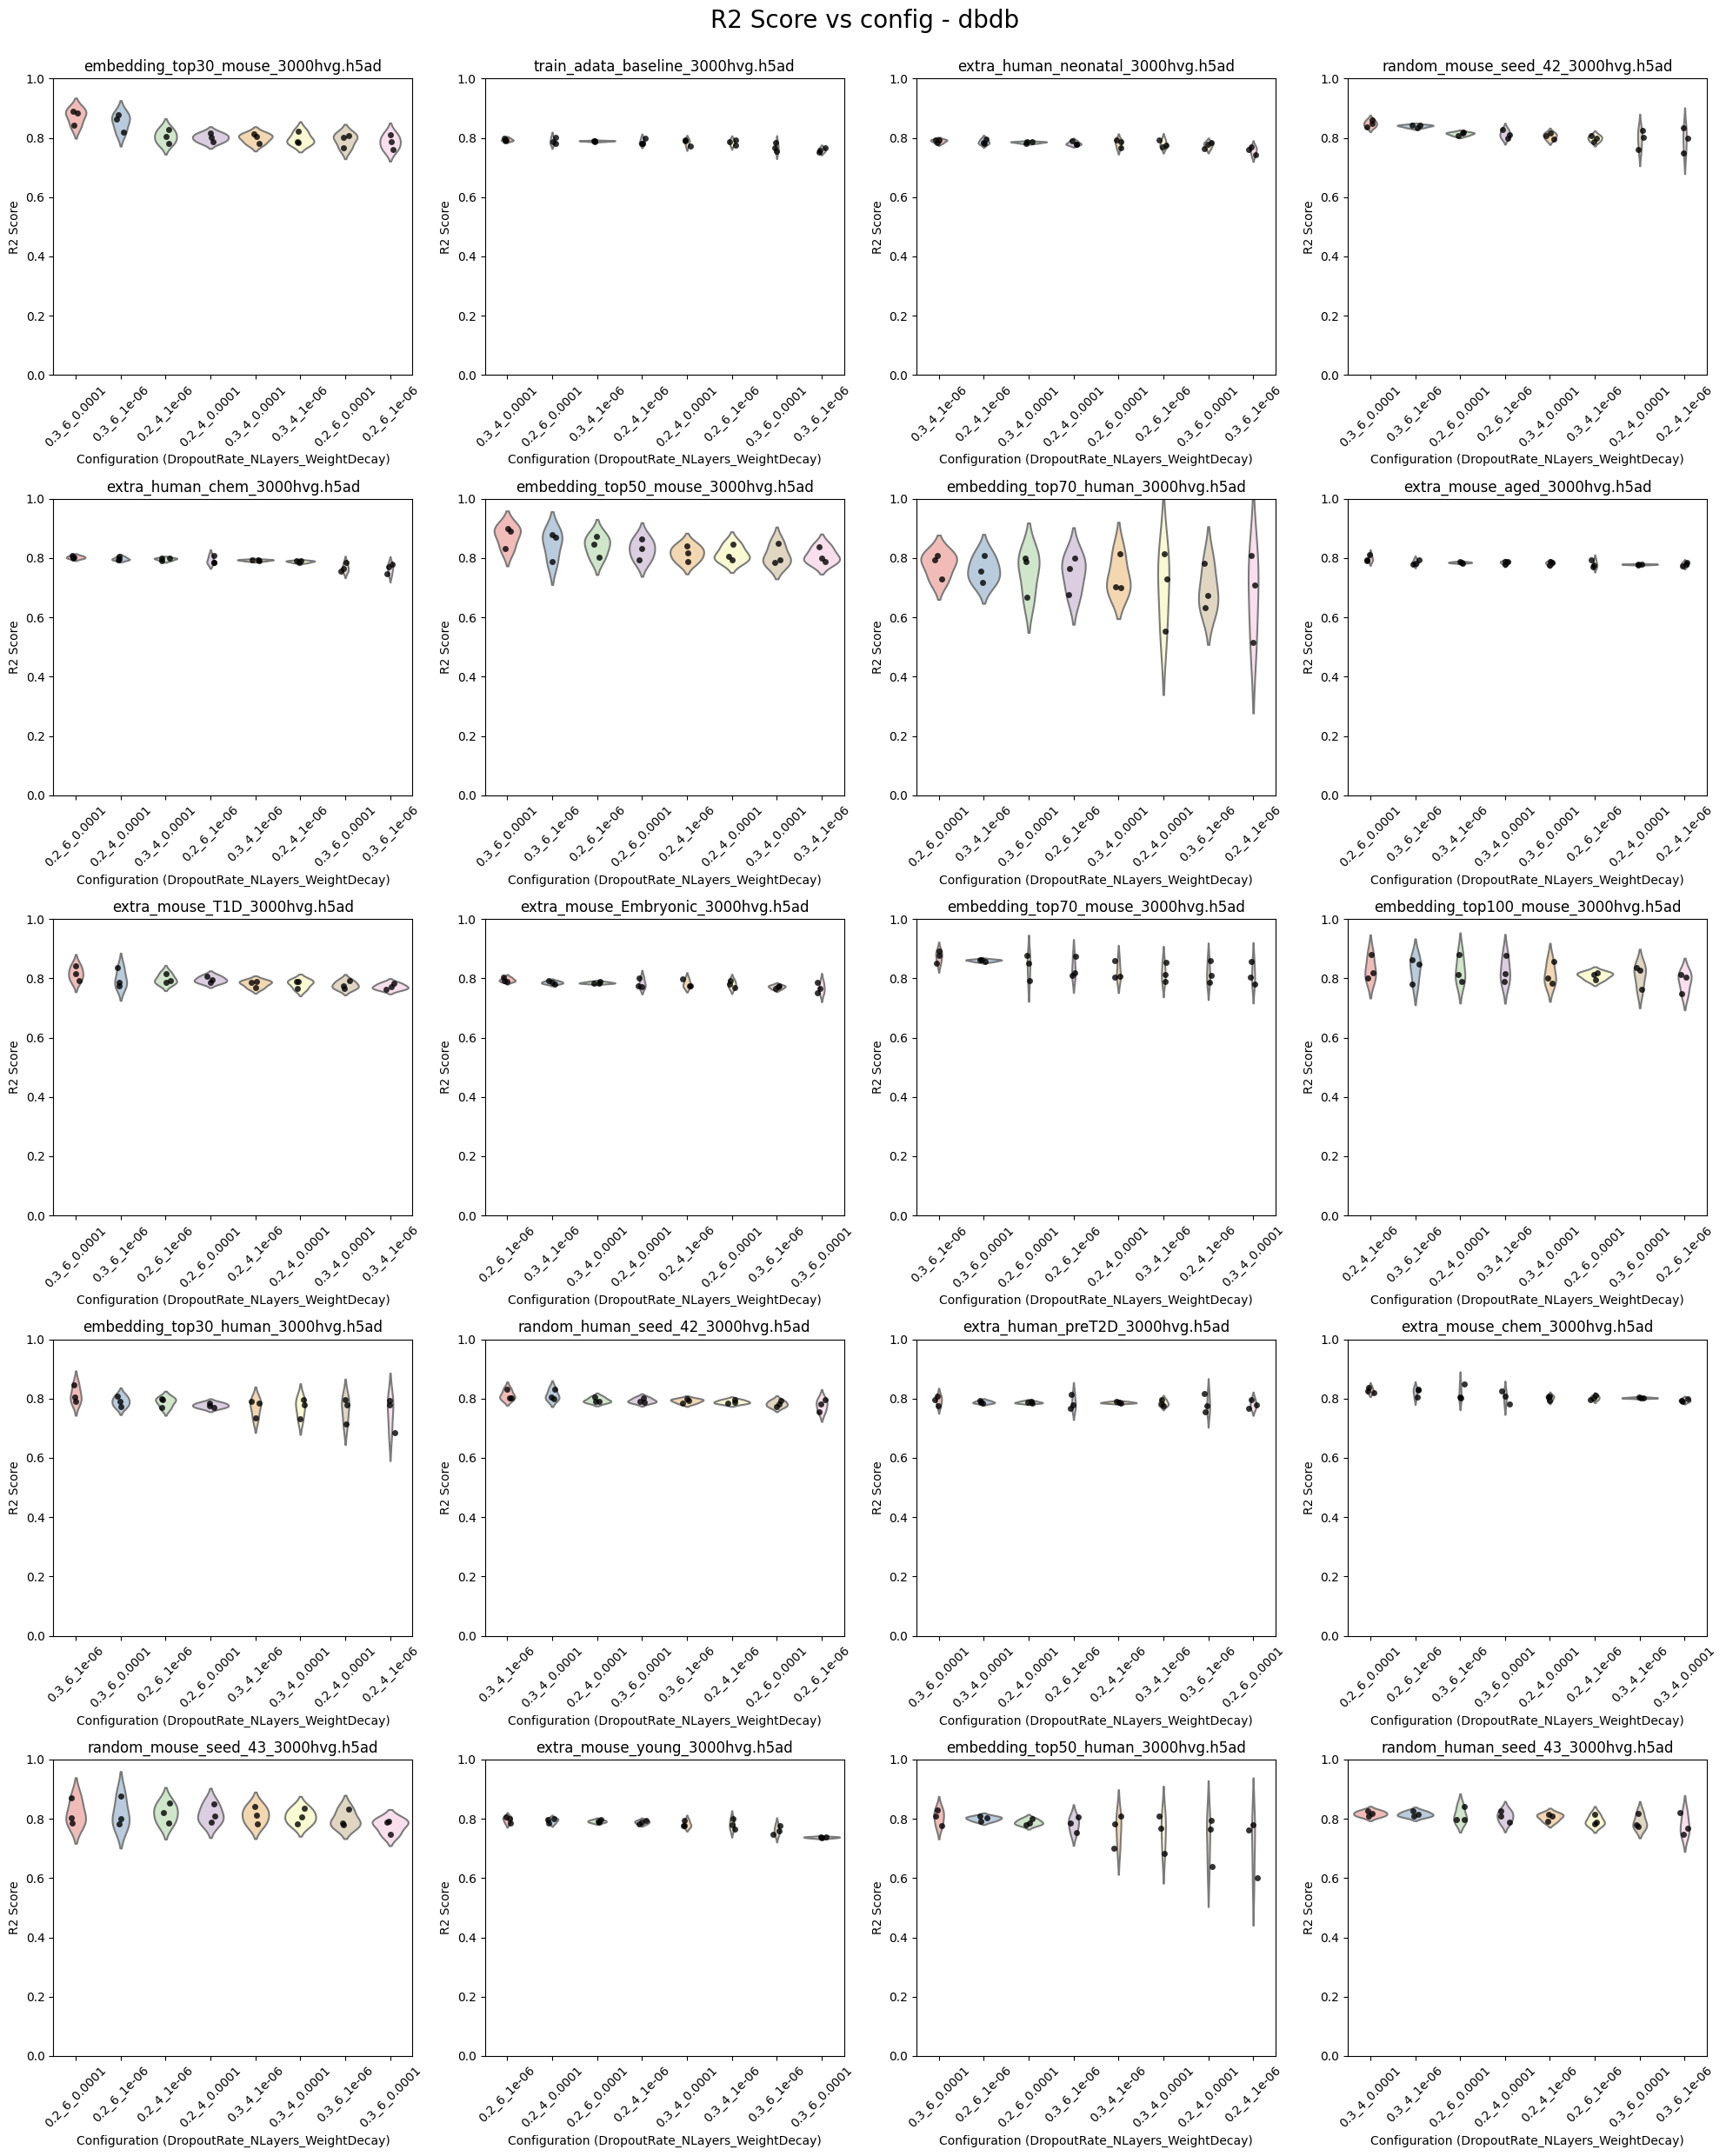

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

OOD_dataset = "dbdb"

# Assuming 'results' is a pandas DataFrame with the necessary data
# Create a new column that combines the settings of weight decay and n_layers for grouping
results['group'] = results.apply(lambda row: f"{row['config.dropout_rate']}_{row['config.n_layers']}_{row['config.weight_decay']}", axis=1)

# Find the unique datasets to create subplots
unique_datasets = results['config.addl_dataset_train'].unique()

# Setup 5x4 subplots
fig, axes = plt.subplots(5, 4, figsize=(20, 25))
axes = axes.ravel()  # Flatten the 5x4 array for easier iteration

# Iterate over each subplot and plot the data
for i, dataset in enumerate(unique_datasets):
    ax = axes[i]
    dataset_results = results[results['config.addl_dataset_train'] == dataset]

    # Calculate the mean R2 score for each group within the current dataset and sort the dataframe by these means
    group_means = dataset_results.groupby('group')[f'result.r2_{OOD_dataset}_OOD'].mean().reset_index()
    sorted_groups = group_means.sort_values(f'result.r2_{OOD_dataset}_OOD', ascending=False)['group']
    sorted_dataset_results = dataset_results.set_index('group').loc[sorted_groups].reset_index()

    sns.violinplot(
        x='group',
        y=f'result.r2_{OOD_dataset}_OOD',
        data=sorted_dataset_results,
        inner=None,
        ax=ax,
        palette="Pastel1"
    )
    
    sns.stripplot(
        x='group',
        y=f'result.r2_{OOD_dataset}_OOD',
        data=sorted_dataset_results,
        jitter=True,
        color='black',
        ax=ax,
        alpha=0.8,
    )
    
    # Set plot details
    ax.set_title(dataset)
    ax.set_xlabel('Configuration (DropoutRate_NLayers_WeightDecay)')
    ax.set_ylabel('R2 Score')
    ax.set_ylim([0, 1])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate the x-axis labels for better readability

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust the layout to prevent overlap
plt.suptitle(f"R2 Score vs config - {OOD_dataset}", fontsize=20, y=0.99)  # Increase the fontsize as needed and adjust y for the position
plt.tight_layout(rect=[0, 0, 1, 0.99])  # Adjust the rect parameters as needed
plt.savefig(f"R2_score_vs_config_{OOD_dataset}")

# Show the plot
plt.show()


### Correlation of metrics mSTZ

In [85]:
metrics_df = results[['result.r2_dbdb_healthy',
       'result.r2_dbdb_OOD', 'result.r2_mSTZ_healthy', 'result.r2_mSTZ_OOD',
       'result.shared_top_genes_dbdb', 'result.scores_corr_dbdb',
       'result.pvals_adj_corr_dbdb', 'result.scores_ranks_corr_dbdb',
       'result.shared_top_genes_mSTZ', 'result.scores_corr_mSTZ',
       'result.pvals_adj_corr_mSTZ', 'result.scores_ranks_corr_mSTZ',
       'result.logfold_corr_dbdb', 'result.logfold_corr_mSTZ']]

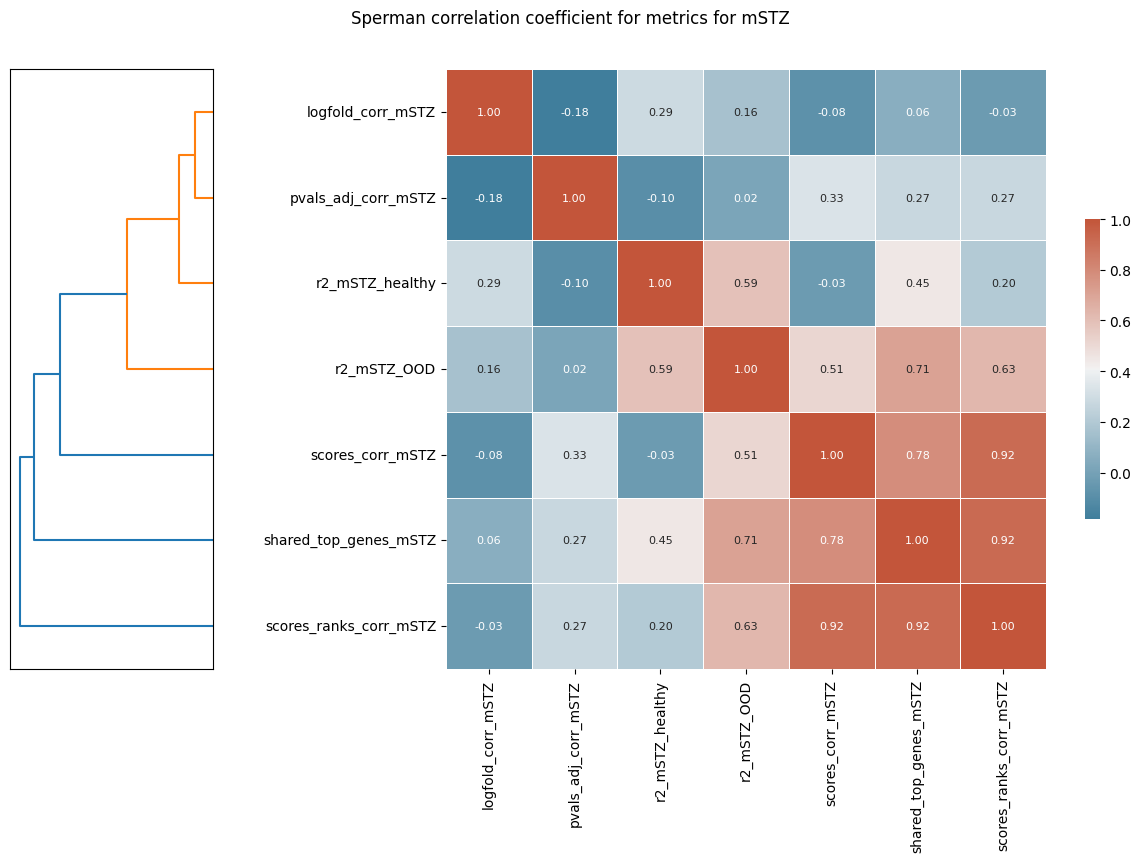

In [125]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy

# Assuming 'metrics_df' is your DataFrame and is already loaded.
OOD_dataset = "mSTZ"

# Filter columns that contain 'mSTZ' in the column name
mstz_columns = [col for col in metrics_df.columns if OOD_dataset in col]
subset_df = metrics_df[mstz_columns]

# Split column names on '.' and keep the second element
split_labels = [col.split('.')[1] if '.' in col else col for col in mstz_columns]

# Calculate the correlation matrix for the filtered DataFrame
corr = subset_df.corr(method = "spearman")

# Create a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Compute the linkage matrix using the correlation matrix
corr_condensed = hierarchy.distance.squareform(1 - corr.abs())  # Convert to condensed form
z = hierarchy.linkage(corr_condensed, method='average')

# Set up the matplotlib figure (adjust figsize to your needs)
fig = plt.figure(figsize=(14, 10))  # Adjust figure size as needed

# Add a subplot for the dendrogram
ax1 = fig.add_axes([0.1, 0.1, 0.145, 0.6])  # Adjust the size and position as needed
dendro = hierarchy.dendrogram(z, labels=split_labels, orientation='left', leaf_font_size=10)
ax1.set_xticks([])
ax1.set_yticks([])

# Reorder the correlation matrix to match the dendrogram order
corr_reordered = corr.iloc[dendro['leaves'], dendro['leaves']]

# Add a subplot for the heatmap
ax2 = fig.add_axes([0.4, 0.1, 0.55, 0.6])  # Adjust the position for space between plots
sns.heatmap(corr_reordered, ax=ax2, cmap=cmap, cbar_kws={'shrink': .5},
            square=True, linewidths=.5, cbar_ax=None, annot=True,
            fmt=".2f", annot_kws={"fontsize": 8})

# Fix the tick labels to match the dendrogram
ax2.set_yticks(np.arange(corr_reordered.shape[0]) + 0.5)
ax2.set_yticklabels([split_labels[i] for i in dendro['leaves']], rotation=0, fontsize=10)
ax2.set_xticks(np.arange(corr_reordered.shape[1]) + 0.5)
ax2.set_xticklabels([split_labels[i] for i in dendro['leaves']], rotation=90, fontsize=10)

# Adjust the suptitle and add space above the top plot
plt.subplots_adjust(top=0.93)
plt.suptitle(f"Sperman correlation coefficient for metrics for {OOD_dataset}", x=0.5, y=0.76)  # Center the suptitle and adjust its position
plt.subplots_adjust(bottom=0.2)
plt.savefig(f"fig_251023/Correlation_of_metrics_{OOD_dataset}.png", bbox_inches='tight')
plt.show()
